### This tests RBM34 RMATS data (uID: 213)

In [59]:
%matplotlib inline
import pandas as pd
from matplotlib_venn import venn2


In [60]:
# get the master ID list for HNRNPK
manifest = pd.read_table('/home/gpratt/Dropbox/encode_integration/20160408_ENCODE_MASTER_ID_LIST_AllDatasets.csv',index_col=0)
hnrnpk = manifest[manifest['uID']=="213"]

print(hnrnpk['RNASEQ_ENCODEAccID'])
print(hnrnpk['RNASEQ_ControlENC'])
hnrnpk['CLIP_rep2']
hnrnpk.to_csv('/home/bay001/projects/maps_20160420/permanent_data/rbm34.tsv',sep='\t')

7    ENCSR318HAT
Name: RNASEQ_ENCODEAccID, dtype: object
7    ENCSR491FOC
Name: RNASEQ_ControlENC, dtype: object


In [73]:
# directory is: ENCSR318HAT_vs_ENCSR491FOC
rmats = pd.read_table('/home/gpratt/projects/encode/analysis/ad-hoc/rMATS/ENCSR318HAT_vs_ENCSR491FOC/MATS_output/SE.MATS.JunctionCountOnly.txt')
print(rmats.shape) # the total number of events returned by rMATS
rmats.head()

(37871, 23)


,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
0,30421,ENSG00000231500.2,RPS18,chr6,+,33243573,33243660,33240363,33240503,33243741,...,"1,1","19922,17130","450,1",185,99,8.928123e-10,0.000034,"1.0,1.0","0.959,1.0",0.020
1,17365,ENSG00000138674.12,SEC31A,chr4,-,83752089,83752128,83750152,83750211,83763292,...,"56,57","106,80","26,24",137,99,1.863713e-07,0.003529,"0.432,0.47","0.747,0.707",-0.276
2,19092,ENSG00000148584.10,A1CF,chr10,-,52623792,52623840,52619601,52619745,52645340,...,"153,199","23,18","138,102",146,99,3.341310e-06,0.042180,"0.022,0.027","0.102,0.107",-0.080
3,18461,ENSG00000100813.10,ACIN1,chr14,-,23559190,23559310,23550956,23551045,23559730,...,"134,138","88,59","72,67",197,99,1.864966e-05,0.141256,"0.21,0.164","0.381,0.307",-0.157
4,23342,ENSG00000221995.4,TIAF1,chr17,-,27412434,27412666,27409333,27409456,27413455,...,"23,28","33,41","43,38",197,99,1.570528e-05,0.141256,"0.559,0.595","0.278,0.352",0.262


In [74]:
# test 'both': both inclusion and exclusion levels past certain FDR
rmats_filtered = rmats[rmats['FDR']<=0.05]
rmats_included = rmats_filtered[rmats_filtered['IncLevelDifference']>0]
rmats_excluded = rmats_filtered[rmats_filtered['IncLevelDifference']<0]
print(rmats_filtered.shape)
rmats_filtered.head()
rmats_filtered_genes = list(rmats_filtered['GeneID'].drop_duplicates())
rmats_filtered_genes = set(rmats_filtered_genes)

(3, 23)


In [75]:
# let's see what our program gives us..
names = ['miso','genes']
events_filtered = pd.read_table('/projects/ps-yeolab3/bay001/maps/se/all_data/7-19-2016/231_01_RBM34.allRMATS_genes.temp',names=names)
events_filtered_genes = set(events_filtered['genes'])

<matplotlib_venn._common.VennDiagram instance at 0x2b34bf288200>

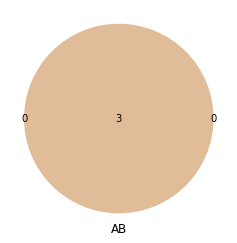

In [76]:
# Good. the events match the ones returned by our program. 
venn2([rmats_filtered_genes,events_filtered_genes])

### Since RBM34 has only three 'significant' events, we can check each of them. 

In [80]:
# These coordinates should match:
for i in range(0,3):
    print(events_filtered['miso'].ix[i])

    print(rmats_filtered.ix[i])
    
    print('##############')

chr6:33240363:33240503:+@chr6:33243573:33243660:+@chr6:33243741:33243843:+
ID                                30421
GeneID                ENSG00000231500.2
geneSymbol                        RPS18
chr                                chr6
strand                                +
exonStart_0base                33243573
exonEnd                        33243660
upstreamES                     33240363
upstreamEE                     33240503
downstreamES                   33243741
downstreamEE                   33243843
ID.1                              30421
IJC_SAMPLE_1                17127,19565
SJC_SAMPLE_1                        1,1
IJC_SAMPLE_2                19922,17130
SJC_SAMPLE_2                      450,1
IncFormLen                          185
SkipFormLen                          99
PValue                      8.92812e-10
FDR                         3.38117e-05
IncLevel1                       1.0,1.0
IncLevel2                     0.959,1.0
IncLevelDifference                 0.02
Name:

### Check on the UCSC genome browser to make sure the included and excluded patterns match what we see on our maps.

In [83]:
rmats_included

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
0,30421,ENSG00000231500.2,RPS18,chr6,+,33243573,33243660,33240363,33240503,33243741,...,"1,1","19922,17130","450,1",185,99,8.928123e-10,0.000034,"1.0,1.0","0.959,1.0",0.02


In [84]:
rmats_excluded

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
1,17365,ENSG00000138674.12,SEC31A,chr4,-,83752089,83752128,83750152,83750211,83763292,...,"56,57","106,80","26,24",137,99,1.863713e-07,0.003529,"0.432,0.47","0.747,0.707",-0.276
2,19092,ENSG00000148584.10,A1CF,chr10,-,52623792,52623840,52619601,52619745,52645340,...,"153,199","23,18","138,102",146,99,3.341310e-06,0.042180,"0.022,0.027","0.102,0.107",-0.080
